# Preprocessing
## Feature engineering


### Chargement des bibliothèques et des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import json
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import metrics
import warnings
import datetime
import time
import re

In [2]:
# Monter Google Drive dans Google Colab pour y accéder
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Accéder au répertoire où se trouve votre fichier "application_train.csv"
import os
os.chdir('/content/drive/My Drive')

# Vérifier que le fichier "application_train.csv" est présent dans le répertoire
!ls

# Charger le dataset
application_train = pd.read_csv('application_train.csv')
application_train


Mounted at /content/drive
 app1.ipynb			      installments_payments.csv
 app1.py			      mlruns
 app2.py			      modele_catboost.ipynb
 app_entrainé.py		      modele_catboost.pkl
 app.ipynb			     'Modélisation (1).ipynb'
 application_test.csv		      Modélisation.ipynb
 application_train.csv		      mon_app.py
 app.msa.ipynb			      Notebook_1_2-2.ipynb
 bureau_balance.csv		     'Notebook 5.ipynb'
 bureau.csv			     'Notebook 7.ipynb'
 catboost_info			     'P3 divers'
'Colab Notebooks'		      POS_CASH_balance.csv
 credit_card_balance.csv	      previous_application.csv
 data_test.csv			      sample_submission.csv
 data_train.csv			      Untitled0.ipynb
 Drifiting_alternatvies.ipynb	      X_test.csv
 HomeCredit_columns_description.csv   X_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Corrélations avec la variable cible

<ipython-input-3-178256496e1d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


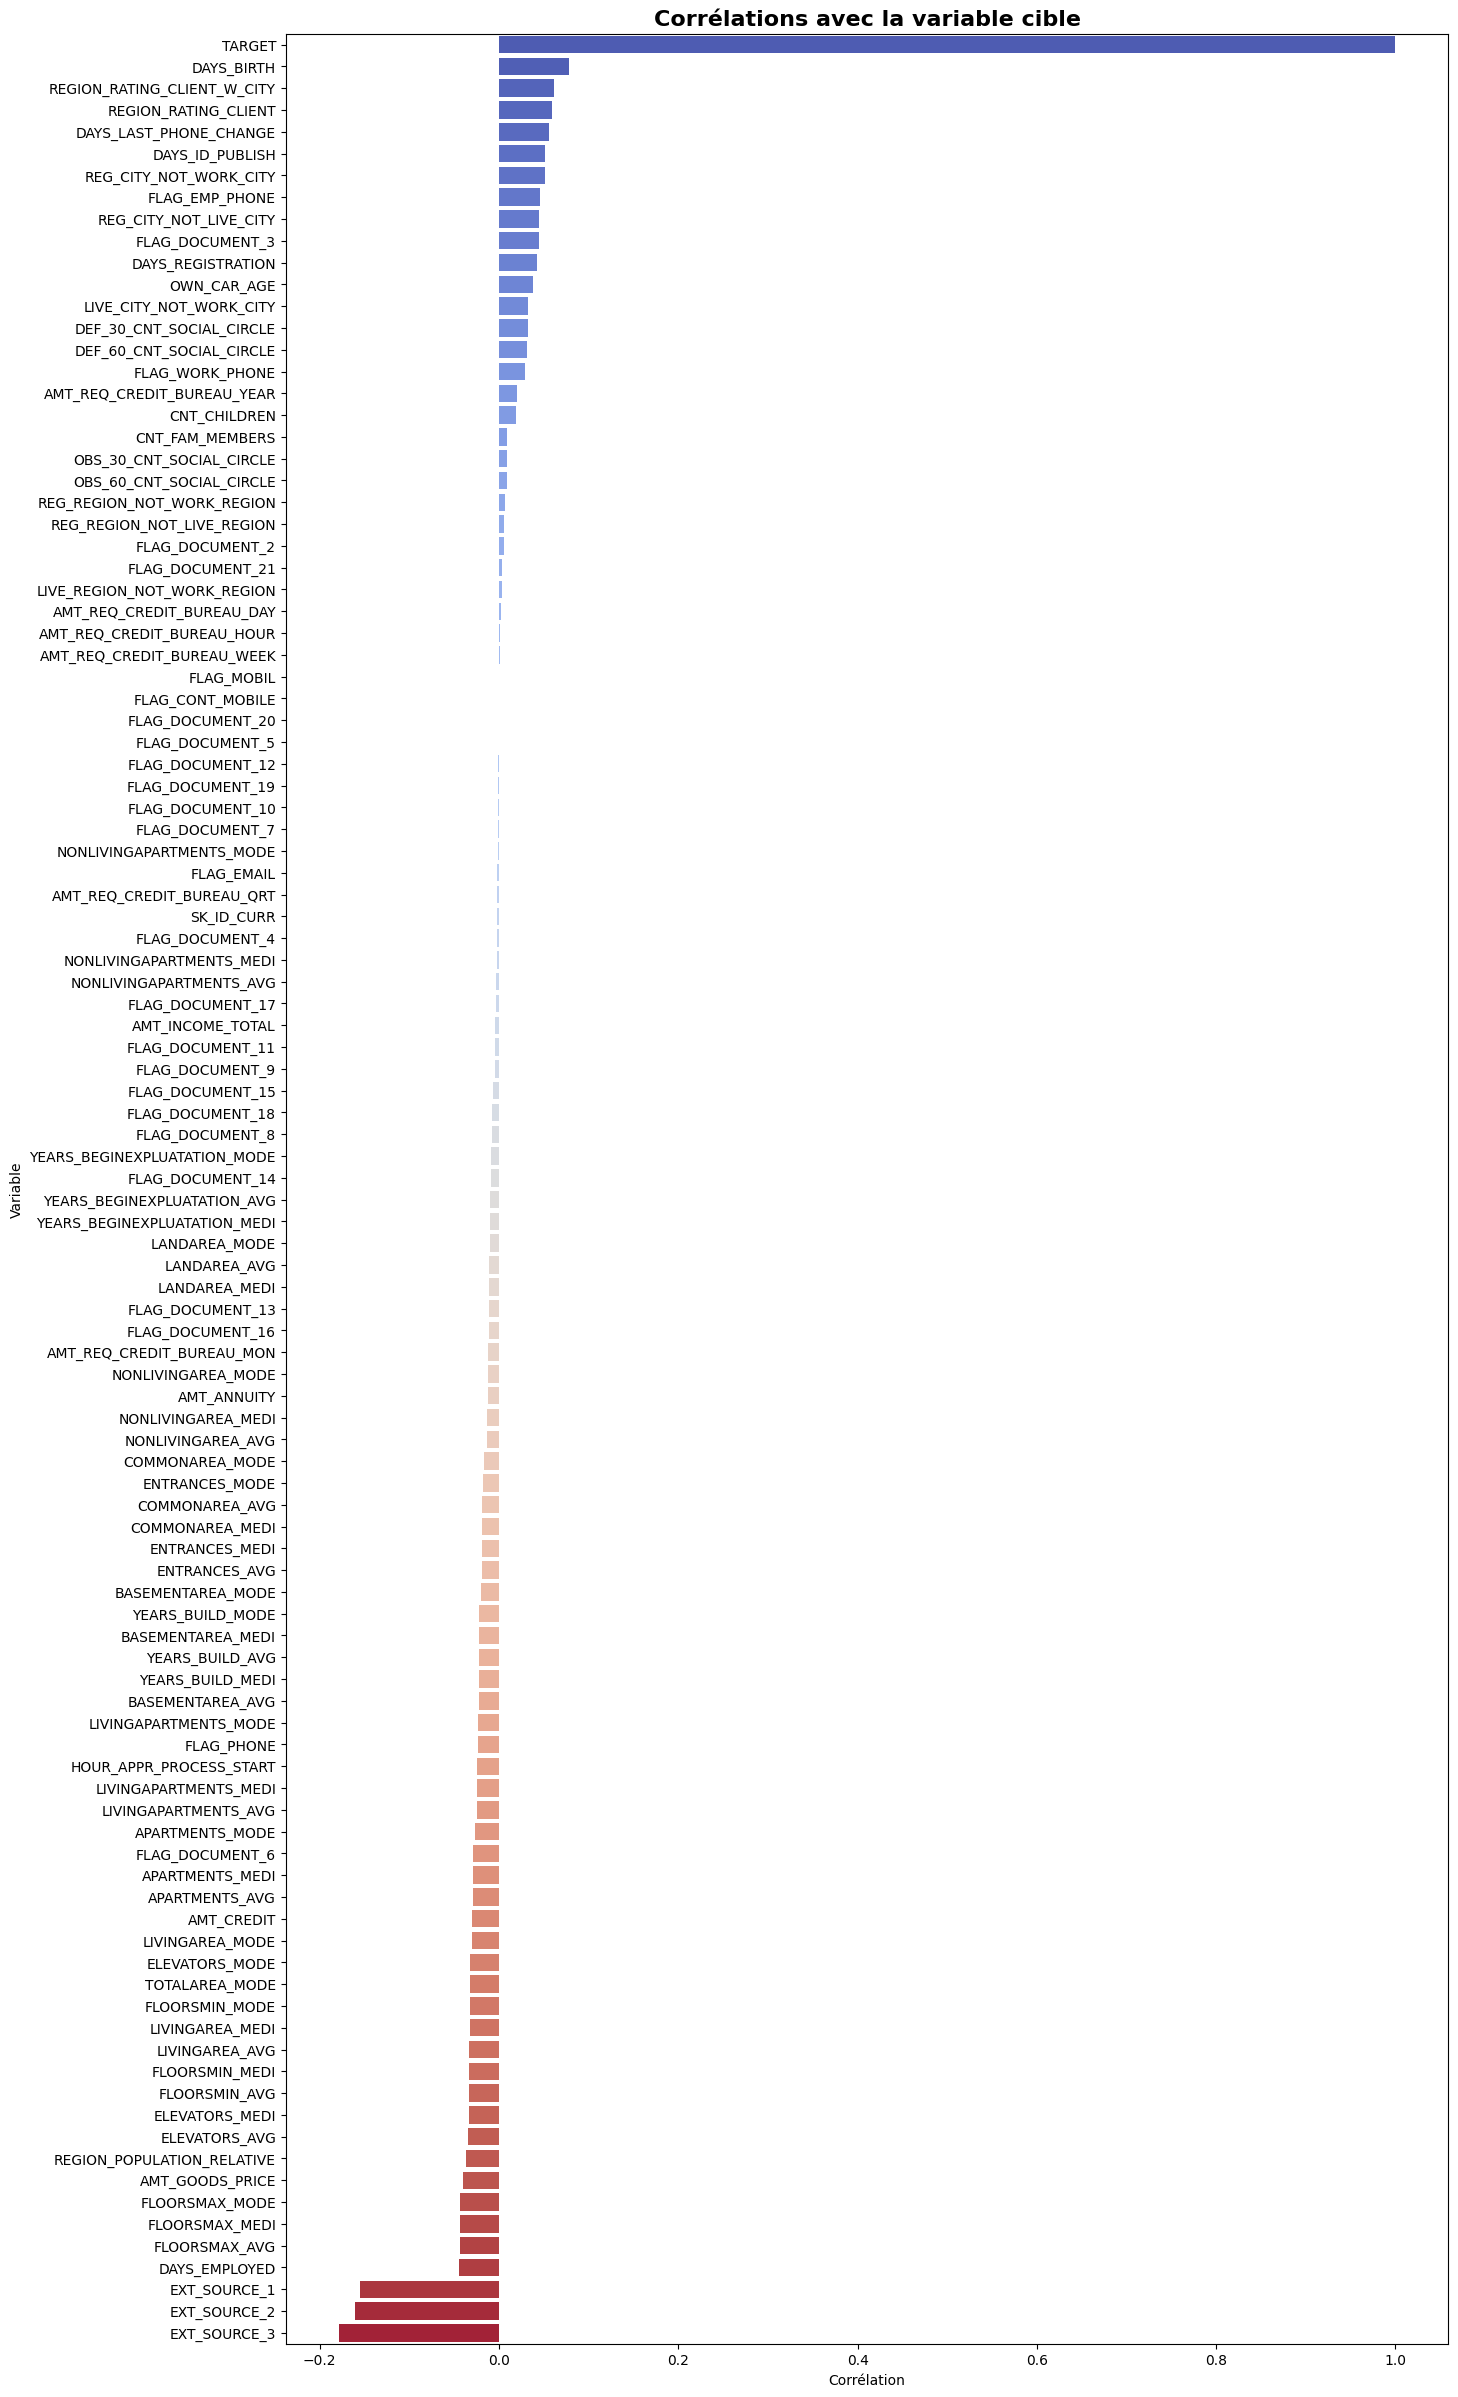

In [3]:
def correlation(data, target):
    corr_matrix = data.corr()
    corr_with_target = corr_matrix[target].sort_values(ascending=False)

    plt.figure(figsize=(15, 30))
    sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="coolwarm")
    plt.title("Corrélations avec la variable cible", fontsize=16, fontweight='bold')
    plt.xlabel("Corrélation")
    plt.ylabel("Variable")
    plt.show()

# Appeler la fonction pour afficher les corrélations avec la variable cible
correlation(application_train, 'TARGET')


#### Variables les plus corrélées avec TARGET

In [4]:
def correlation(data, target, max_vars=5):
    corr_matrix = data.corr()
    corr_with_target = corr_matrix[target].sort_values(ascending=False)
    most_correlated_vars_pos = corr_with_target[1:max_vars+1].index.tolist()

    corr_with_target_neg = corr_matrix[target].sort_values(ascending=True)
    most_correlated_vars_neg = corr_with_target_neg[0:max_vars].index.tolist()

    most_correlated_vars = most_correlated_vars_pos + most_correlated_vars_neg

    print("Variables les plus corrélées avec TARGET :")
    print(most_correlated_vars)

# Appeler la fonction pour afficher les corrélations avec la variable cible
correlation(application_train, 'TARGET', max_vars=5)


<ipython-input-4-0b0e05f8794f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


Variables les plus corrélées avec TARGET :
['DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_EMPLOYED', 'FLOORSMAX_AVG']


In [5]:
# les variables qualitatives
categorical_variables = application_train.select_dtypes(include=['object']).columns.tolist()
categorical_variables

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [6]:
from sklearn.preprocessing import LabelEncoder

# Liste des variables catégorielles à encoder
variables_catégorielles = categorical_variables

# Créer un LabelEncoder pour chaque variable catégorielle
label_encoders = {}
for variable in variables_catégorielles:
    le = LabelEncoder()
    application_train[variable] = le.fit_transform(application_train[variable])
    label_encoders[variable] = le
application_train_encoded = application_train

# Afficher les 5 premières lignes du dataset encodé
application_train_encoded.head(5)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:

def get_correlated_features(data, target, threshold=0.01):
    """
    Retourne la liste des variables corrélées avec la variable cible (TARGET) dans le dataset.

    Paramètres :
    data : DataFrame - Le dataset contenant les variables d'intérêt, y compris la variable cible.
    target : str - Le nom de la variable cible.
    threshold : float - Seuil de corrélation à partir duquel les variables sont considérées comme corrélées.
                        Par défaut, le seuil est fixé à 0.01.

    Retourne :
    correlated_features : list - Liste des noms des variables corrélées avec la variable cible.
    """

    # Créer un DataFrame contenant uniquement la variable cible et les autres variables du dataset
    target_and_features = data[[target] + list(data.columns.difference([target]))]

    # Calculer la matrice de corrélation entre les variables
    correlation_matrix = target_and_features.corr()

    # Obtenir les corrélations avec la variable cible (en valeur absolue)
    correlations_with_target = correlation_matrix[target].abs()

    # Filtrer les variables corrélées en fonction du seuil
    correlated_features = correlations_with_target[correlations_with_target > threshold].index.tolist()

    # Retirer la variable cible elle-même de la liste
    correlated_features.remove(target)

    return correlated_features

# Nom de la variable cible
target_variable = 'TARGET'

# Obtenir la liste des variables corrélées avec la variable cible
correlated_features = get_correlated_features(application_train_encoded, target_variable)

# Afficher la liste des variables corrélées
print(correlated_features)



['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'CNT_CHILDREN', 'CODE_GENDER', 'COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'EMERGENCYSTATE_MODE', 'ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_6', 'FLAG_EMP_PHONE', 'FLAG_OWN_CAR', 'FLAG_PHONE', 'FLAG_WORK_PHONE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FONDKAPREMONT_MODE', 'HOUR_APPR_PROCESS_START', 'HOUSETYPE_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'LANDA

In [8]:
# Afficher la longueur de la liste des variables corrélées
print("Longueur de la liste des variables corrélées :", len(correlated_features))

Longueur de la liste des variables corrélées : 80


In [9]:
application_train_encoded.shape

(307511, 122)

In [10]:
application_train_encoded

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Liste des colonnes 
desired_order = ["SK_ID_CURR", "TARGET"] + correlated_features

# Réorganiser les colonnes du DataFrame
application_train_encoded = application_train_encoded[desired_order]
application_train_encoded

,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,...,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,WALLSMATERIAL_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,100002,1,24700.5,406597.5,351000.0,0.0,1.0,0.0247,0.0250,0.0252,...,0.018801,2,2,0,0,0.0149,5,0.6192,0.6243,0.6341
1,100003,0,35698.5,1293502.5,1129500.0,0.0,0.0,0.0959,0.0968,0.0924,...,0.003541,1,1,0,0,0.0714,0,0.7960,0.7987,0.8040
2,100004,0,6750.0,135000.0,135000.0,0.0,0.0,NaN,NaN,NaN,...,0.010032,2,2,0,0,NaN,7,NaN,NaN,NaN
3,100006,0,29686.5,312682.5,297000.0,NaN,NaN,NaN,NaN,NaN,...,0.008019,2,2,0,0,NaN,7,NaN,NaN,NaN
4,100007,0,21865.5,513000.0,513000.0,0.0,0.0,NaN,NaN,NaN,...,0.028663,2,2,0,1,NaN,7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,27558.0,254700.0,225000.0,NaN,NaN,0.2021,0.2040,0.1008,...,0.032561,1,1,0,0,0.2898,5,0.8300,0.8323,0.7125
307507,456252,0,12001.5,269550.0,225000.0,NaN,NaN,0.0247,0.0250,0.0252,...,0.025164,2,2,0,0,0.0214,5,0.6260,0.6310,0.6406
307508,456253,0,29979.0,677664.0,585000.0,1.0,1.0,0.1031,0.1041,0.1050,...,0.005002,3,3,0,1,0.7970,4,0.7484,0.7518,0.7583
307509,456254,1,20205.0,370107.0,319500.0,0.0,0.0,0.0124,0.0125,0.0126,...,0.005313,2,2,1,1,0.0086,5,NaN,NaN,NaN


In [12]:
# Supprimer les colonnes contenant plus de 50% de valeurs manquantes
def drop_columns_with_missing_values(dataframe, threshold=0.5):
    missing_percentages = dataframe.isnull().mean()
    columns_to_drop = missing_percentages[missing_percentages > threshold].index
    dataframe.drop(columns=columns_to_drop, inplace=True)
    return dataframe

# Appliquer la fonction sur le dataframe application_train_encoded
application_train_encoded = drop_columns_with_missing_values(application_train_encoded, threshold=0.6)
application_train_encoded

<ipython-input-12-ce4076a3260d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.drop(columns=columns_to_drop, inplace=True)


,SK_ID_CURR,TARGET,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,...,NONLIVINGAREA_MODE,OCCUPATION_TYPE,ORGANIZATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,WALLSMATERIAL_MODE
0,100002,1,24700.5,406597.5,351000.0,0.0,1.0,0.0247,0.0250,0.0252,...,0.0000,8,5,0.018801,2,2,0,0,0.0149,5
1,100003,0,35698.5,1293502.5,1129500.0,0.0,0.0,0.0959,0.0968,0.0924,...,0.0000,3,39,0.003541,1,1,0,0,0.0714,0
2,100004,0,6750.0,135000.0,135000.0,0.0,0.0,NaN,NaN,NaN,...,NaN,8,11,0.010032,2,2,0,0,NaN,7
3,100006,0,29686.5,312682.5,297000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,8,5,0.008019,2,2,0,0,NaN,7
4,100007,0,21865.5,513000.0,513000.0,0.0,0.0,NaN,NaN,NaN,...,NaN,3,37,0.028663,2,2,0,1,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,27558.0,254700.0,225000.0,NaN,NaN,0.2021,0.2040,0.1008,...,0.0125,14,43,0.032561,1,1,0,0,0.2898,5
307507,456252,0,12001.5,269550.0,225000.0,NaN,NaN,0.0247,0.0250,0.0252,...,0.0000,18,57,0.025164,2,2,0,0,0.0214,5
307508,456253,0,29979.0,677664.0,585000.0,1.0,1.0,0.1031,0.1041,0.1050,...,0.0000,10,39,0.005002,3,3,0,1,0.7970,4
307509,456254,1,20205.0,370107.0,319500.0,0.0,0.0,0.0124,0.0125,0.0126,...,NaN,8,3,0.005313,2,2,1,1,0.0086,5


In [13]:
data_train = application_train_encoded

# Enregistrer le dataframe 'data_train' au format CSV
data_train.to_csv('data_train.csv', index=False)

In [14]:
data_train.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_CHILDREN',
 'CODE_GENDER',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE',
 'ENTRANCES_AVG',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_EMP_PHONE',
 'FLAG_OWN_CAR',
 'FLAG_PHONE',
 'FLAG_WORK_PHONE',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_MODE',
 'FONDKAPREMONT_MODE',
 'HOUR_APPR_PROCESS_START',
 'HOUSETYPE_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LIVE_CITY_NOT_WORK_CITY'